In [41]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [42]:
df = pd.read_csv('/content/airbnb.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop(columns=['id'], inplace=True)
df.drop(columns=['host_id'], inplace=True)
df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            38821 non-null  object 
 1   host_name                       38821 non-null  object 
 2   neighbourhood_group             38821 non-null  object 
 3   neighbourhood                   38821 non-null  object 
 4   latitude                        38821 non-null  float64
 5   longitude                       38821 non-null  float64
 6   room_type                       38821 non-null  object 
 7   price                           38821 non-null  int64  
 8   minimum_nights                  38821 non-null  int64  
 9   number_of_reviews               38821 non-null  int64  
 10  last_review                     38821 non-null  object 
 11  reviews_per_month               38821 non-null  float64
 12  calculated_host_listings_count  38821

In [44]:
non_numeric_cols = df.select_dtypes(exclude='number').columns
df.drop(non_numeric_cols, axis=1, inplace=True)

In [45]:
x = df.values

#scaleing
scaler = StandardScaler()
x = scaler.fit_transform(x)

#elbow method
sse = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

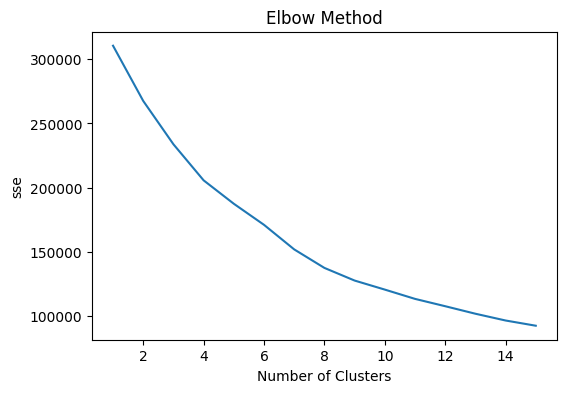

In [47]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 16), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('sse')
plt.title('Elbow Method')
plt.show()

In [48]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#print
print("Cluster Labels:", labels)
print("Cluster Centroids:\n", centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Labels: [1 1 4 ... 0 0 0]
Cluster Centroids:
 [[-3.01247274e-03 -1.43431093e-01 -5.39533542e-02 -8.04508442e-02
  -3.60530438e-01 -3.95340960e-01 -1.33342448e-01 -7.00394089e-01]
 [ 6.46888810e-03  1.90902223e-01  1.07063336e-01  2.88779915e-01
  -1.97986761e-01 -1.68541888e-01  8.73774148e-02  1.29259965e+00]
 [ 4.90854022e-02 -1.94846609e-01  3.19665798e+01  8.09441844e-01
  -5.11050721e-01 -4.67114792e-01 -8.65967863e-02  5.46018302e-01]
 [-1.88470093e-01 -1.12274207e+00  6.58042113e-01  1.08099217e-01
  -4.92209740e-01  2.04854117e-01  1.18054511e+01  1.32371386e+00]
 [ 6.69010180e-03  2.25547096e-01 -1.01789778e-01 -1.95583843e-01
   1.57212428e+00  1.61814697e+00 -1.17852520e-01  2.67073150e-01]]


In [49]:
#prediction
pred = kmeans.fit_predict(x)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 4, ..., 0, 0, 0], dtype=int32)

IndexError: index 8 is out of bounds for axis 1 with size 8

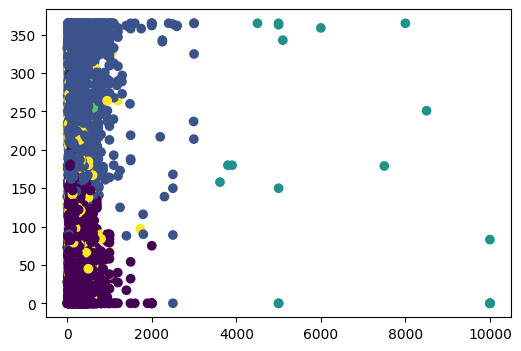

In [50]:

# Select the two features you want to plot
#x_feature = df['price']
#y_feature = df['availability_365']

# Create the scatter plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df['price'], df['availability_365'], c=labels, cmap='viridis')
ax.scatter(centroids[:, df['price'].index], centroids[:,  df['availability_365'].index], marker='x', s=200, c='red', label='Centroids')
ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_title(f'Clusters ({x_feature}, {y_feature})')
ax.legend()

plt.tight_layout()
plt.show()